In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import joblib

In [ ]:
df = pd.read_csv('/content/PHL_HWC.csv')
df.head()

,P_NAME,P_DETECTION,P_DISCOVERY_FACILITY,P_YEAR,P_UPDATE,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_MASS_LIMIT,P_MASS_ORIGIN,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
0,OGLE-2016-BLG-1227L b,Microlensing,OGLE,2020,2020-04-02,250.00,-120.0,413.0,0,Mass,...,NaN,0.214133,0,0,NaN,0,NaN,Scorpius,Sco,Scorpion
1,Kepler-276 c,Transit,Kepler,2013,2018-09-25,16.60,-3.6,4.4,0,Mass,...,2.097783,0.316980,0,0,Hot,0,0.272032,Cygnus,Cyg,Swan
2,Kepler-829 b,Transit,Kepler,2016,2019-04-16,5.10,NaN,NaN,0,M-R relationship,...,1.756317,0.459559,0,0,Hot,0,0.254763,Lyra,Lyr,Lyre
3,K2-283 b,Transit,K2,2018,2019-09-05,12.20,NaN,NaN,0,M-R relationship,...,0.568374,0.443760,0,0,Hot,0,0.193906,Pisces,Psc,Fishes
4,Kepler-477 b,Transit,Kepler,2016,2019-04-16,4.94,NaN,NaN,0,M-R relationship,...,0.768502,0.386150,0,0,Hot,0,0.276721,Lyra,Lyr,Lyre


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Columns: 118 entries, P_NAME to S_CONSTELLATION_ENG
dtypes: float64(81), int64(18), object(19)
memory usage: 5.0+ MB


(5599, 118)

In [ ]:
# Factors on which P_TYPE depends => P_RADIUS, P_MASS, P_DENSITY
depending_factors = ['P_RADIUS', 'P_MASS', 'P_DENSITY', 'P_TYPE']
df[depending_factors].isnull().sum()

,0
P_RADIUS,7
P_MASS,7
P_DENSITY,7
P_TYPE,7


In [ ]:
df.dropna(subset=['P_TYPE'], inplace=True)

In [ ]:
df[depending_factors].isnull().sum()

,0
P_RADIUS,0
P_MASS,0
P_DENSITY,0
P_TYPE,0


In [ ]:
# Calculating the number of planets
df['P_TYPE'].value_counts()

,count
P_TYPE,
Jovian,1706
Neptunian,1401
Superterran,1347
Terran,1060
Subterran,69
Miniterran,9


In [ ]:
df.shape

(5592, 118)

In [ ]:
new_csv_file_cols = df[['P_NAME', 'P_MASS', 'P_RADIUS', 'P_DENSITY', 'P_TYPE']]
new_csv_file_cols.to_csv('type_of_planet.csv', index=False)

In [ ]:
type_of_planet_df = pd.read_csv('/content/type_of_planet.csv')
type_of_planet_df.head()


,P_NAME,P_MASS,P_RADIUS,P_DENSITY,P_TYPE
0,OGLE-2016-BLG-1227L b,250.00,13.90,0.093088,Jovian
1,Kepler-276 c,16.60,2.90,0.680635,Neptunian
2,Kepler-829 b,5.10,2.11,0.542904,Superterran
3,K2-283 b,12.20,3.52,0.279725,Neptunian
4,Kepler-477 b,4.94,2.07,0.556950,Superterran


In [ ]:
# Label Encoding the target column
le = LabelEncoder()
type_of_planet_df['P_TYPE'] = le.fit_transform(type_of_planet_df['P_TYPE'])

In [ ]:
type_of_planet_df.head()

,P_NAME,P_MASS,P_RADIUS,P_DENSITY,P_TYPE
0,OGLE-2016-BLG-1227L b,250.00,13.90,0.093088,0
1,Kepler-276 c,16.60,2.90,0.680635,2
2,Kepler-829 b,5.10,2.11,0.542904,4
3,K2-283 b,12.20,3.52,0.279725,2
4,Kepler-477 b,4.94,2.07,0.556950,4


In [ ]:
# Label to number mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label to Number Mapping:")
print(label_mapping)


Label to Number Mapping:
{'Jovian': 0, 'Miniterran': 1, 'Neptunian': 2, 'Subterran': 3, 'Superterran': 4, 'Terran': 5}


In [ ]:
# Features and Targets
X = type_of_planet_df[['P_MASS', 'P_RADIUS', 'P_DENSITY']]
Y = type_of_planet_df['P_TYPE']
print(X,Y)

         P_MASS  P_RADIUS  P_DENSITY
0     250.00000     13.90   0.093088
1      16.60000      2.90   0.680635
2       5.10000      2.11   0.542904
3      12.20000      3.52   0.279725
4       4.94000      2.07   0.556950
...         ...       ...        ...
5587  581.62598     13.40   0.241729
5588   17.20000      2.49   1.114116
5589   11.30000      3.90   0.190495
5590    4.33000      1.92   0.611764
5591  555.24623     13.50   0.225675

[5592 rows x 3 columns] 0       0
1       2
2       4
3       2
4       4
       ..
5587    0
5588    2
5589    2
5590    4
5591    0
Name: P_TYPE, Length: 5592, dtype: int64


In [ ]:
# Standardizing the values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Handling the class imbalance as outliers are present in this
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_scaled, Y)

In [ ]:
# Seperating the test and training data (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, random_state=42, test_size=0.2)

In [ ]:
print(pd.DataFrame(X_train))
print(pd.DataFrame(Y_train))

             0         1         2
0    -0.185592 -0.793944 -0.021319
1    -0.183946 -0.418590 -0.073544
2    -0.185237 -0.747611 -0.032918
3    -0.183866 -0.599420 -0.053244
4    -0.186748 -0.987259 -0.039810
...        ...       ...       ...
8183 -0.186741 -0.982234 -0.038295
8184 -0.184621 -0.676329 -0.044862
8185 -0.182929 -0.515008 -0.059422
8186 -0.183726 -0.586290 -0.054362
8187 -0.186735 -0.975464 -0.036130

[8188 rows x 3 columns]
      P_TYPE
2955       5
1438       2
4772       4
696        4
6797       1
...      ...
5734       1
5191       4
5390       2
860        2
7270       1

[8188 rows x 1 columns]


In [ ]:
# Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predicting the test set
Y_pred = log_reg.predict(X_test)

In [ ]:
# Evaluate the model using classification report
report = classification_report(Y_test, Y_pred, target_names=le.classes_)
print(report)

              precision    recall  f1-score   support

      Jovian       0.99      0.98      0.98       337
  Miniterran       0.81      1.00      0.90       343
   Neptunian       0.94      0.93      0.94       333
   Subterran       0.84      0.75      0.79       340
 Superterran       0.93      0.90      0.91       354
      Terran       0.91      0.84      0.87       341

    accuracy                           0.90      2048
   macro avg       0.90      0.90      0.90      2048
weighted avg       0.90      0.90      0.90      2048



In [ ]:
# Decision Trees

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Predicting the test set
Y_pred = decision_tree.predict(X_test)

In [ ]:
# Evaluate the model using classification report
report = classification_report(Y_test, Y_pred, target_names=le.classes_)
print(report)

              precision    recall  f1-score   support

      Jovian       1.00      1.00      1.00       337
  Miniterran       1.00      1.00      1.00       343
   Neptunian       0.97      0.98      0.97       333
   Subterran       1.00      1.00      1.00       340
 Superterran       0.97      0.97      0.97       354
      Terran       1.00      0.99      1.00       341

    accuracy                           0.99      2048
   macro avg       0.99      0.99      0.99      2048
weighted avg       0.99      0.99      0.99      2048



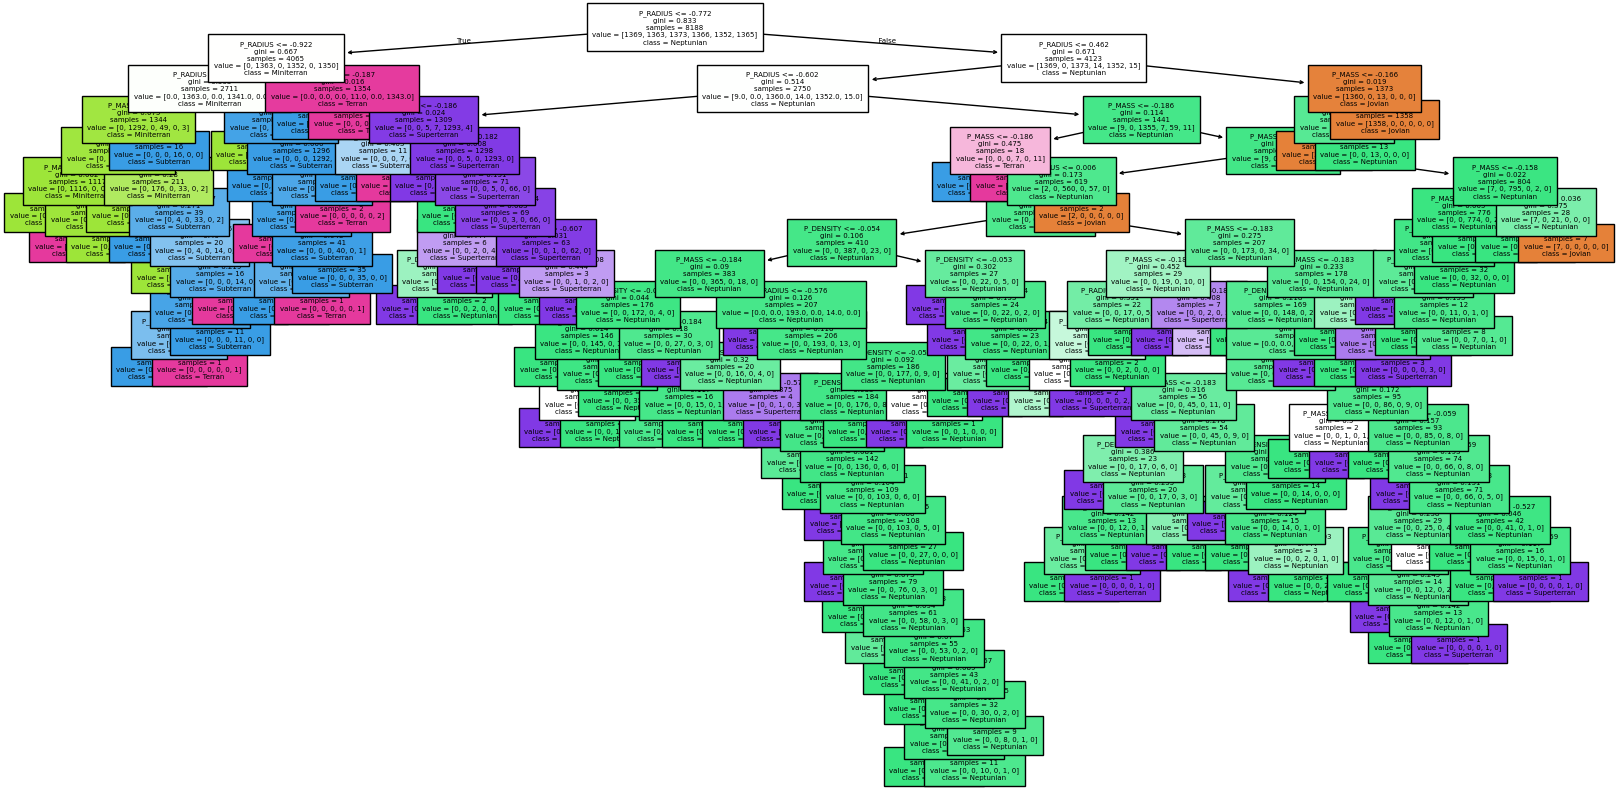

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=le.classes_, fontsize=5)
plt.show()

In [ ]:
# Random Forest Classifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting the test set

Y_pred = random_forest.predict(X_test)

In [ ]:
# Evaluate the model using classification report
report = classification_report(Y_test, Y_pred, target_names=le.classes_)
print(report)

              precision    recall  f1-score   support

      Jovian       1.00      1.00      1.00       337
  Miniterran       1.00      1.00      1.00       343
   Neptunian       0.97      0.98      0.98       333
   Subterran       0.99      1.00      1.00       340
 Superterran       0.97      0.97      0.97       354
      Terran       1.00      0.99      1.00       341

    accuracy                           0.99      2048
   macro avg       0.99      0.99      0.99      2048
weighted avg       0.99      0.99      0.99      2048



Precision - Number of correct predictions (TP / TP + FP)
Recall - Number of actual planets correctly predicted (TP / TP + FN)
F1-Score - 2 * (Precision * Recall) / (Precision + Recall)
Support - Number of data in the test set

Accuracy - Number of test data correctly classified (TP + TN) / (TP + TN + FP + FN)
Macro Avg - Arithmetic Mean
Weighted Avg - Weighted Average

Let's use the decision tree as it gives a better result in all the 5 classes of planets

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)
joblib.dump(decision_tree, 'type_of_planet.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
data = [[17.15, 3.88,	0.0701294709951194]]
X_scaled_data = scaler.transform(data)
print(X_scaled_data)

[[-0.1795351  -0.34430743 -0.0801315 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(decision_tree.predict(X_scaled_data))

[2]


In [ ]:
from google.colab import files
files.download('type_of_planet.joblib')
files.download('scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>